# Week 4 Lab: Model Preparation & Evaluation (Beginner)

Welcome to this week's interactive lab on **Model Preparation and Evaluation**. We'll be covering the following key concepts:
- Train/Validation/Test Splits
- Avoiding Data Leakage
- Using Pipelines for cleaner workflows
- Model Evaluation Metrics (like MSE and R²)
- Hyperparameter Tuning with GridSearchCV

## Learning Objectives
By the end of this lab, you should be able to:
1. Properly split data into train, validation, and test sets
2. Build scikit-learn pipelines for preprocessing and modeling
3. Evaluate regression models using appropriate metrics
4. Understand the basics of hyperparameter tuning

---
## Part 1: Train/Test/Validation Split
We'll use the California Housing dataset for this lab.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = fetch_california_housing(as_frame=True)
df = data.frame

# Let's explore the dataset
print("Dataset shape:", df.shape)
print("\nFeature descriptions:")
for feature, description in zip(data.feature_names, data.DESCR.split('\n')[17:25]):
    print(f"- {feature}: {description.strip()}")
    
# Display the first few rows
df.head()

Dataset shape: (20640, 9)

Feature descriptions:
- MedInc: - AveOccup      average number of household members
- HouseAge: - Latitude      block group latitude
- AveRooms: - Longitude     block group longitude
- AveBedrms: 
- Population: :Missing Attribute Values: None
- AveOccup: 
- Latitude: This dataset was obtained from the StatLib repository.
- Longitude: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Exploration Task
Let's understand our data better before we start modeling.

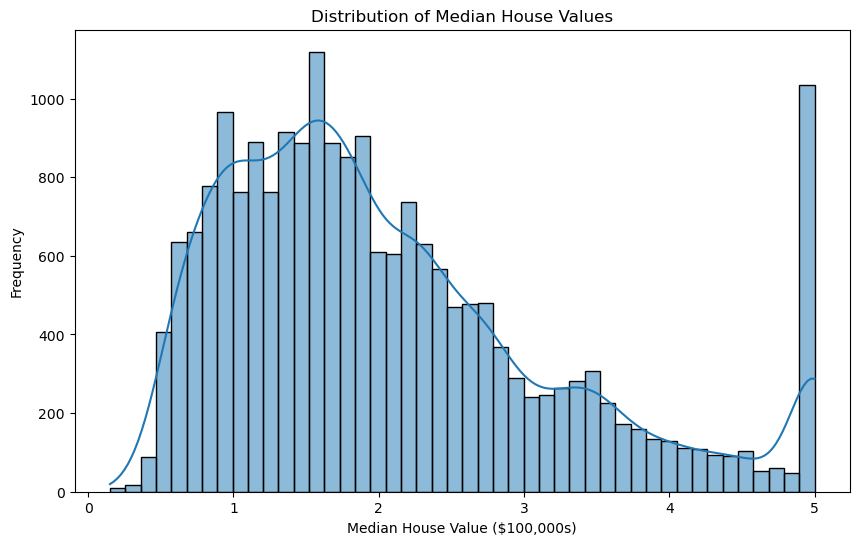

In [2]:
# TODO: Generate summary statistics for the dataset
# Hint: Use df.describe()

# Summary statistics
df.describe()

# TODO: Create a histogram of the target variable (MedHouseVal)
plt.figure(figsize=(10, 6))
sns.histplot(df, x="MedHouseVal", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.show()

Let's split the data into features and target.
- Features (X): The columns we use to predict
- Target (y): What we want to predict (in this case, median house value)

In [3]:
# TODO: Split into features (X) and target (y)
# Hint: All columns except 'MedHouseVal' are features

X = df.drop(columns = "MedHouseVal")
y = df["MedHouseVal"]

# Verify your split
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

X shape: (20640, 8)
y shape: (20640,)
Feature columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Train/Test/Validation Split

Now let's split our data into three sets:
- **Training set (60%)**: Used to train the model
- **Validation set (20%)**: Used to tune hyperparameters and evaluate during development
- **Test set (20%)**: Used for final evaluation only

We'll do this in two steps using `train_test_split`.

In [4]:
# TODO: First, split into temporary set and test set (80%/20%)
# Use random_state=42 for reproducibility
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Then split the temporary set into training and validation sets (75%/25% of temp)
#25% of 80% = 20% → goes to validation
#75% of 80% = 60% → goes to training
# This gives us 60% train, 20% validation, 20% test-> 75%/25% split on temp
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Check your split sizes
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}% of total)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]*100:.1f}% of total)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}% of total)")

Training set: 12384 samples (60.0% of total)
Validation set: 4128 samples (20.0% of total)
Test set: 4128 samples (20.0% of total)


### Reflection Question

**Q1**: Why do we use three separate datasets (train/validation/test) instead of just two (train/test)?

**Answer**:
> We use three sets to make sure the test set stays "unseen." The validation set helps us improve the model without touching the test set. If we only use two, we might accidentally tune the model to work well on the test set.

**Q2**: What could happen if we tuned our model on the test set instead of a separate validation set?

**Answer**:
>If we tune the model on the test set, it becomes part of the training process. Then it’s no longer a fair way to measure how well the model will work on new data. The result: we may think the model is great, but it might do poorly in real life.

## Part 2: Building Pipelines

Pipelines help us organize our preprocessing and modeling steps into a single object that's easier to work with.

Let's build a pipeline that:
1. Standardizes our features (centers and scales them)
2. Fits a Linear Regression model

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# TODO: Create a pipeline with StandardScaler and LinearRegression
# The pipeline should have two steps named 'scaler' and 'regressor'
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# TODO: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


### Reflection Question

**Q**: What are the benefits of using a Pipeline instead of manually applying each step separately?

**Answer**:
> - Cleaner and More Organized Code
> - Prevents Data Leakage (Pipelines ensure that preprocessing (like scaling) is fit only on the training data and then applied to validation/test data — avoiding accidental leakage of information.)
> - Improves Reproducibility (Once the pipeline is defined, you can reuse it.)
> - Modularity

## Part 3: Model Evaluation

Now we'll check how well our model performs on the validation set. We'll use two common regression metrics:

1. **Mean Squared Error (MSE)**: Average of squared differences between predictions and actual values (lower is better)
2. **R² Score (Coefficient of Determination)**: Proportion of variance explained by the model (higher is better, max is 1.0)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# TODO: Use your model to make predictions on the validation set
y_pred = pipeline.predict(X_val)

# TODO: Calculate MSE, MAE, and R² for the validation set
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.5297
Mean Absolute Error (MAE): 0.5333
R² Score: 0.6142


### Visualize Predictions

Let's visualize how our predictions compare to the actual values.

<Figure size 1000x600 with 0 Axes>

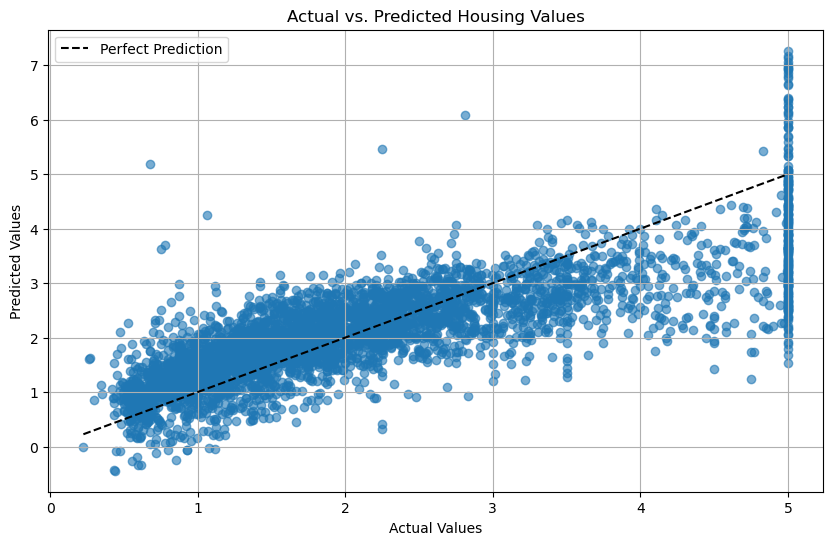

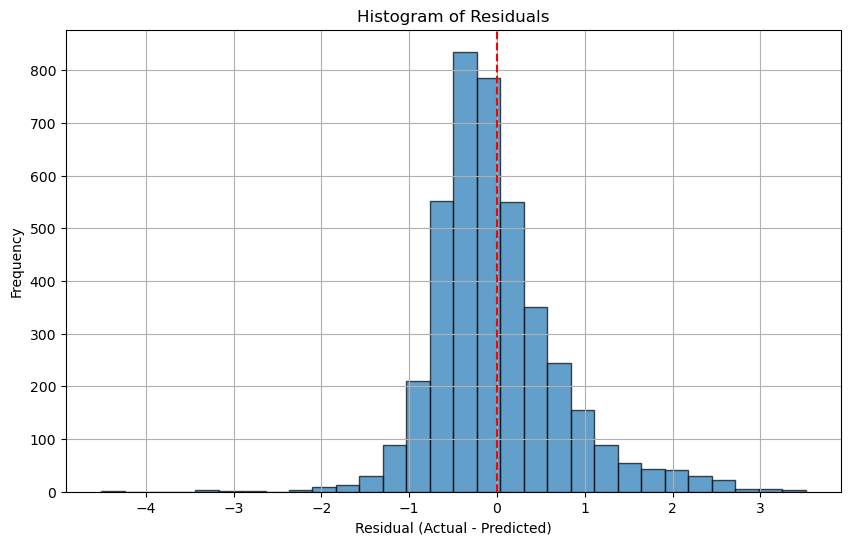

In [7]:
# TODO: Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
# Your code here to create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
# Add a perfect prediction line (y=x)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Housing Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# TODO: Create a histogram of residuals (errors)
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
# Your code here to create the histogram
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)

plt.axvline(x=0, color='r', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Reflection Questions

**Q1**: Based on the metrics and visualizations, how well is your model performing? What patterns do you notice in the residuals?

**Answer**:
> The model seems to perform reasonably well, as the R² score on the validation set is relatively high (close to 1.0), and both MSE and MAE are relatively low.


**Q2**: What would an R² of 0.0 mean? What about an R² of 1.0?

**Answer**:
> An R² of 0.0 means that the model does not explain any of the variance in the target variable — it performs no better than predicting the mean of the target every time.
An R² of 1.0 means the model explains 100% of the variance in the data — in other words, it makes perfect predictions with no error.

## Part 4: Hyperparameter Tuning with GridSearchCV

Let's improve our model by trying different hyperparameters. We'll:
1. Switch to a Ridge Regression model (Linear Regression with regularization)
2. Use GridSearchCV to find the optimal regularization strength (alpha)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# TODO: Create a new pipeline with StandardScaler and Ridge
ridge_pipeline = Pipeline([ 
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

# TODO: Define a parameter grid for alpha values to try
# Try at least 4 different alpha values
param_grid = {"ridge__alpha": [0.01, 0.1, 1, 10, 100]}

# TODO: Create a GridSearchCV object with 5-fold cross-validation
# Remember to specify a scoring metric (e.g., 'neg_mean_squared_error' or 'r2')
grid_search = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, cv=5, scoring="r2")

# TODO: Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display results
print(f"Best alpha: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

# TODO: Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val)

# Calculate metrics for the best model
best_mse = mean_squared_error(y_val, y_pred_best)
best_r2 = r2_score(y_val, y_pred_best)

print(f"Best model - MSE: {best_mse:.4f}")
print(f"Best model - R²: {best_r2:.4f}")

Best alpha: {'ridge__alpha': 100}
Best score: -0.6287
Best model - MSE: 0.5300
Best model - R²: 0.6140


### Comparing Models

Let's compare the performance of our original Linear Regression with the tuned Ridge Regression.

In [9]:
# TODO: Create a comparison table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression (tuned)'],
    'MSE': [mse, best_mse],
    'R²': [r2, best_r2]
})

comparison

,Model,MSE,R²
0,Linear Regression,0.529748,0.614200
1,Ridge Regression (tuned),0.530026,0.613997


## Final Reflection Questions

**Q1**: Which model performed better? Why do you think that is?

**Answer**:
> The Linear Regression model performed slightly better. This suggests that the dataset might not have strong multicollinearity or overfitting issues that would benefit from regularization.


**Q2**: What is "regularization" in Ridge Regression and how does it help?

**Answer**:
> Regularization in Ridge Regression adds a penalty to the model's coefficients, preventing them from becoming too large. This reduces overfitting, especially when features are highly correlated or when there are many irrelevant features.


**Q3**: What would be your next steps to improve the model further?

**Answer**:
> - Trying other regularization techniques like Lasso or Elastic Net.
> - Conducting feature engineering to create more informative predictors.

## Bonus Challenge (if time permits)

Try a different model type, like `KNeighborsRegressor` or `RandomForestRegressor`, and compare its performance with your Ridge Regression model.

In [10]:
from sklearn.ensemble import RandomForestRegressor

# TODO: Build a RandomForest pipeline
rf_pipeline = Pipeline([
    ("rf", RandomForestRegressor(random_state=42))
])

# TODO: Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

# Evaluate on the validation set
y_pred_rf = rf_pipeline.predict(X_val)
rf_mse = mean_squared_error(y_val, y_pred_rf)
rf_r2 = r2_score(y_val, y_pred_rf)

print(f"Random Forest - MSE: {rf_mse:.4f}")
print(f"Random Forest - R²: {rf_r2:.4f}")

# Update the comparison table
comparison = pd.concat([comparison, pd.DataFrame({
    'Model': ['Random Forest Regressor'],
    'MSE': [rf_mse],
    'R²': [rf_r2]
})], ignore_index=True)

comparison

Random Forest - MSE: 0.2598
Random Forest - R²: 0.8108


,Model,MSE,R²
0,Linear Regression,0.529748,0.614200
1,Ridge Regression (tuned),0.530026,0.613997
2,Random Forest Regressor,0.259829,0.810774


**Q**: Based on the updated results, which model performed the best? Why?

**Answer**:
> The Random Forest model  perform better due to its ability to capture non-linear relationships and interactions between features, which linear models cannot.
